## 1. Setup

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Anemia.csv')

## 2. Exploratory Data Analysis (EDA)

Primero es necesario que conozcmos con cuantos datos contamos y que tipo de datos son.

In [8]:
print("La cantidad de datos que contiene el dataset crudo es de: ", df.shape[0])

La cantidad de datos que contiene el dataset crudo es de:  104


Ahora vemos cuales son los nombres de las columnas y que puede significar cada una de ellas.

In [9]:
columnas = "\n"
for col in df.columns:
    columnas += col + ", \n"

columnas = columnas[:-3]
print("Las columnas que contiene el dataset crudo son: ", columnas)

Las columnas que contiene el dataset crudo son:  
Number, 
Sex, 
%Red Pixel, 
%Green pixel, 
%Blue pixel, 
Hb, 
Anaemic


Number: Se refiere al número de la fila.

Sex: Se refiere al sexo de la persona.

%Red Pixels: Se refiere al porcentaje de pixeles rojos en la imagen.

%Green Pixels: Se refiere al porcentaje de pixeles verdes en la imagen.

%Blue Pixels: Se refiere al porcentaje de pixeles azules en la imagen.

Hb: Se refiere a la hemoglobina en la sangre.

Anemic: Se refiere a si la persona es anémica o no (varaible objetivo).

**Ahora es necesario que veamos la distribución y valores de nuestros datos**

Para poder ver la distribución de los datos, es necesario hacer un hot encoding de la variable objetivo y al sexo. En los comentarios del dataset se menciona que el sexo tiene un typo y tiene un espacio por lo que lo quitaremos para poder hacer el hot encoding.

In [10]:
df['Sex'] = df['Sex'].str.strip().map(lambda x: x.upper() if isinstance(x, str) else x)
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0}).fillna(-1).astype(int)

df['Anaemic'] = df['Anaemic'].str.strip().map(lambda x: x.lower() if isinstance(x, str) else x)
df['Anaemic'] = df['Anaemic'].map({'yes': 1, 'no': 0}).fillna(-1).astype(int)

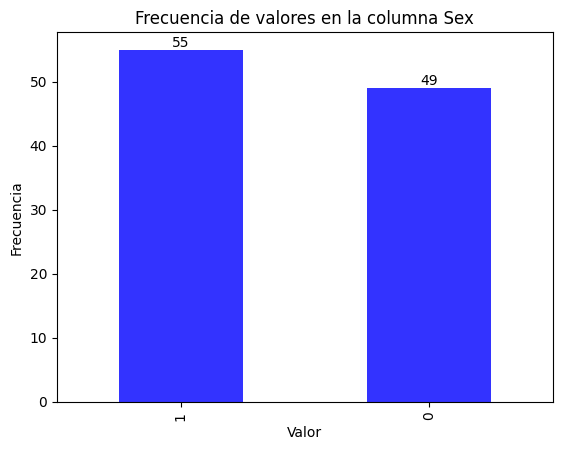

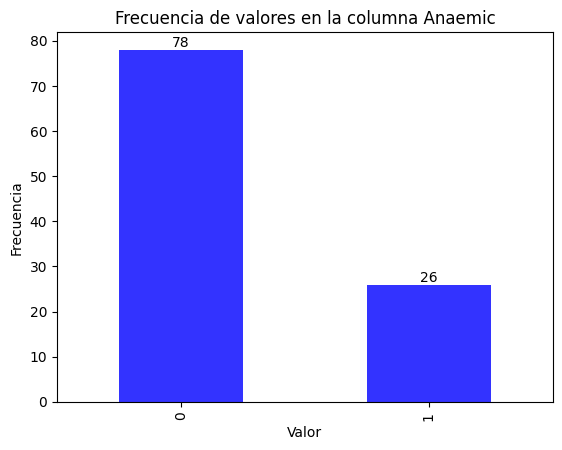

In [11]:
columns = ['Sex', 'Anaemic']

# Filtrar solo las columnas numéricas para hacer los histogramas
numeric_columns = df.select_dtypes(include=[np.number])

# Crear histogramas para cada columna numérica
for column in columns:
    frecuencia = df[column].value_counts()
    
    # Graficar la frecuencia como un gráfico de barras
    plt.figure()
    ax = frecuencia.plot(kind='bar', color='blue', alpha=0.8)
    plt.title(f'Frecuencia de valores en la columna {column}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

    # Añadir el número de elementos contados encima de cada barra
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2, height, str(int(height)), 
                ha='center', va='bottom')
    
    plt.show()


A primera instancia podemos ver que el dataset es bastante pequeño, con unicacmente 104 registros de los cuales 55 son hombres y 49 son mujeres. En cuanto a nuestro variable objetivo, podemos ver que hay 78 personas que no son anémicas y 26 que si lo son. Esto puede que sea un problema ya que la clase objetivo está desbalanceada.

**Ahora es necesario que analizemos las columnas de porcentaje de color**

Es neecesario ver la distribución de los datos para validar que no existan valores atípicos y entender como estos se compartan.

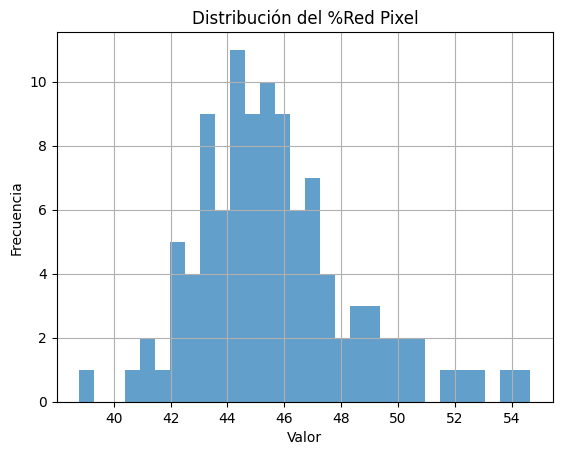

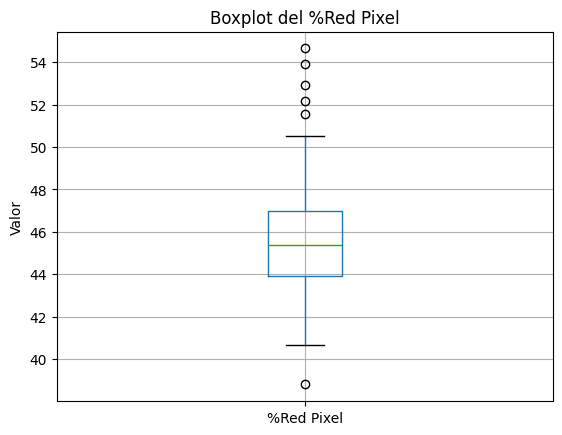

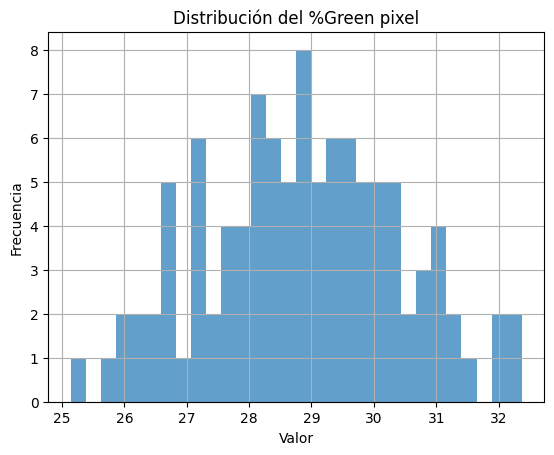

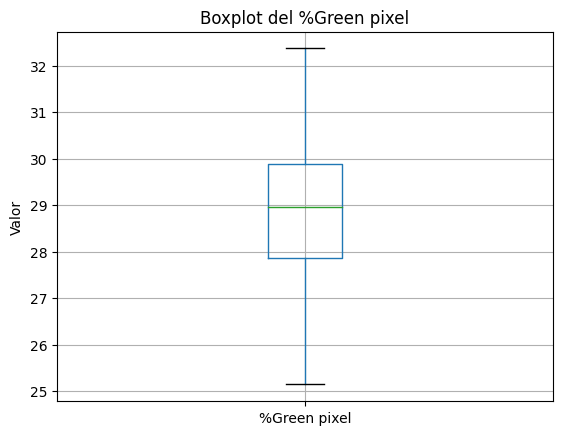

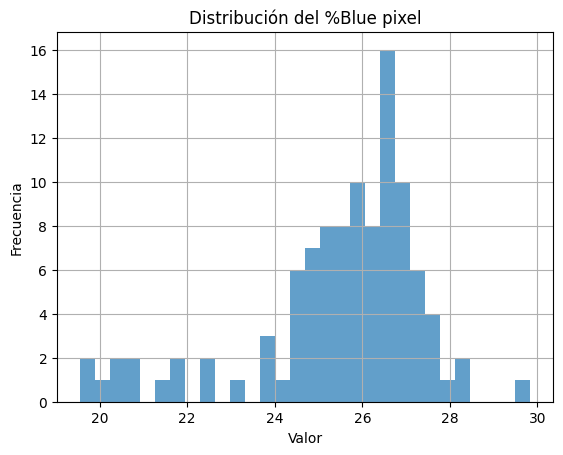

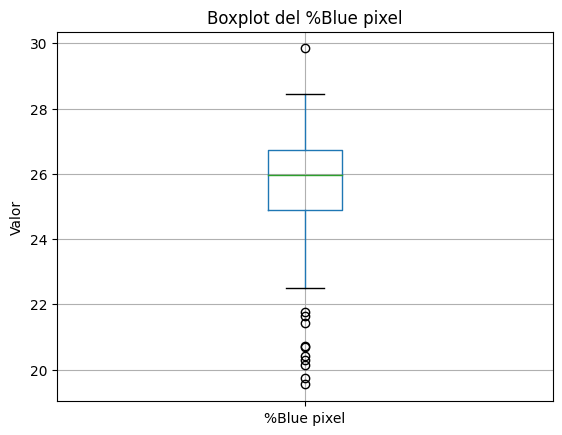

In [12]:
import matplotlib.pyplot as plt

columns = ['%Red Pixel', '%Green pixel', '%Blue pixel']
for column in columns:
    plt.figure()
    df[column].hist(bins=30, alpha=0.7)
    plt.title(f'Distribución del {column}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.show()

    plt.figure()
    df.boxplot(column=column)
    plt.title(f'Boxplot del {column}')
    plt.ylabel('Valor')
    plt.show()


Podemos ver que los datos tiene sentido ya que estamos trabajando con porcentajes y estos no pueden ser mayores a 100 ni menores a 0. Por lo que no hay valores atípicos en estas columnas.

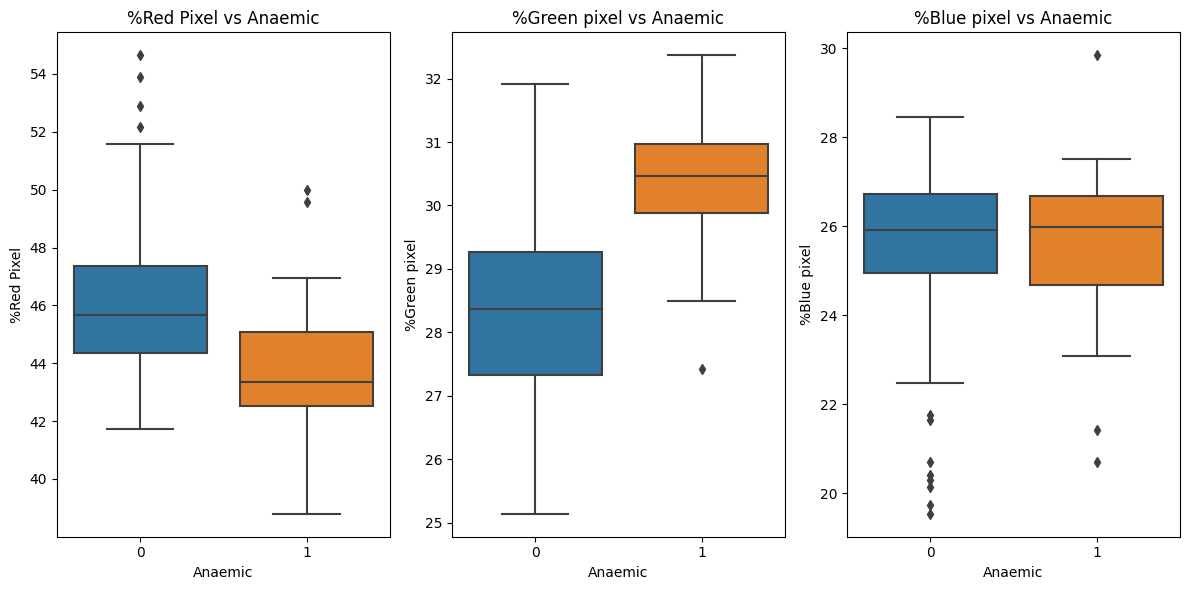

In [13]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(['%Red Pixel', '%Green pixel', '%Blue pixel'], start=1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Anaemic', y=column, data=df)
    plt.title(f'{column} vs Anaemic')
plt.tight_layout()
plt.show()


Si analisamos el anterior gráfico podemos ver que el porcentaje del color azul no varía tanto si se tiene o no anemia, sin embargo, el porcentaje de color rojo y verde si varía, en defininta el cambio es más notorio en el verde. Por lo que podemos decir que estas dos variables son posibles candidatas importantes para nuestro modelo.

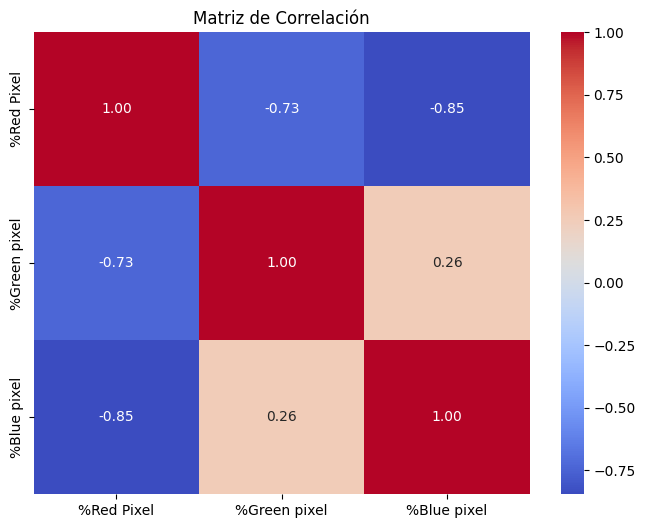

C:\Users\DELL\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


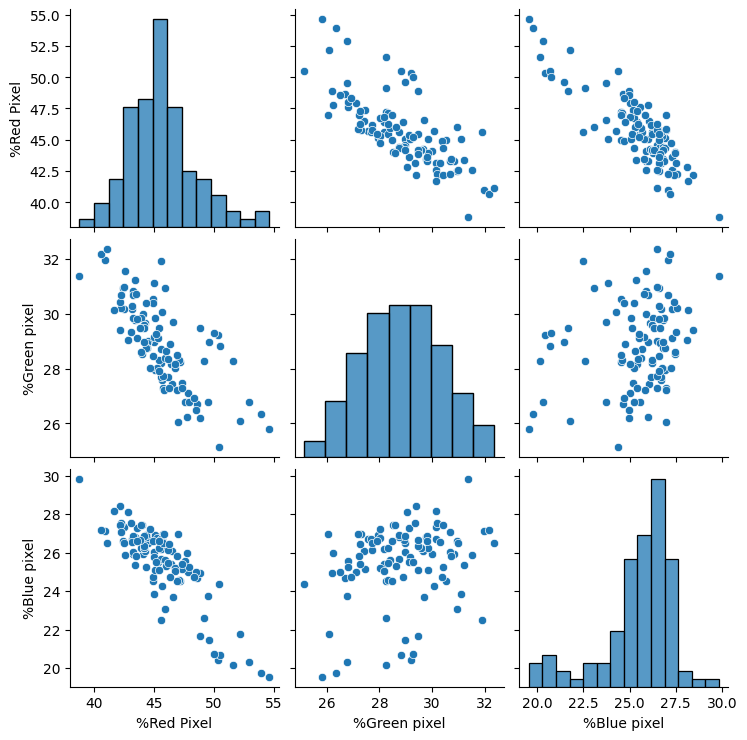

In [14]:
import seaborn as sns

# Matriz de correlación
plt.figure(figsize=(8, 6))
correlation_matrix = df[['%Red Pixel', '%Green pixel', '%Blue pixel']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

# Scatter plots
sns.pairplot(df[['%Red Pixel', '%Green pixel', '%Blue pixel']])
plt.show()


Con los dos graficos de arriba podemos ver que existe una relación negativa entre los colores lo cual tiene sentido ya que si un color aumenta el otro disminuye. Pero esto no nos dice mucho sobre la relación con la anemia.

**Y por ultimo evaliamos la hemoglobina**

In [15]:
print(df['Hb'].describe())

count    104.000000
mean      12.150962
std        2.512957
min        2.800000
25%       10.650000
50%       12.600000
75%       14.000000
max       16.300000
Name: Hb, dtype: float64


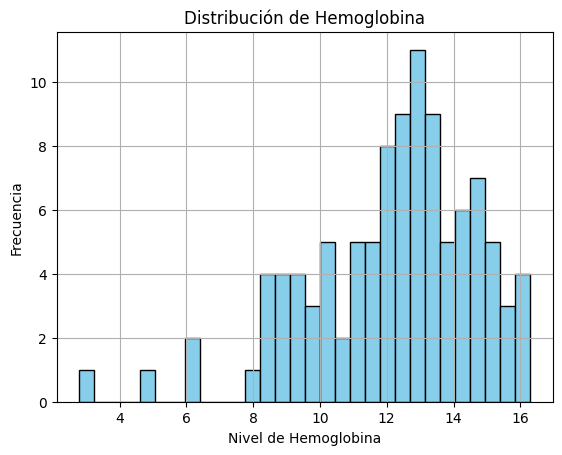

In [16]:
plt.figure()
df['Hb'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Hemoglobina')
plt.xlabel('Nivel de Hemoglobina')
plt.ylabel('Frecuencia')
plt.show()


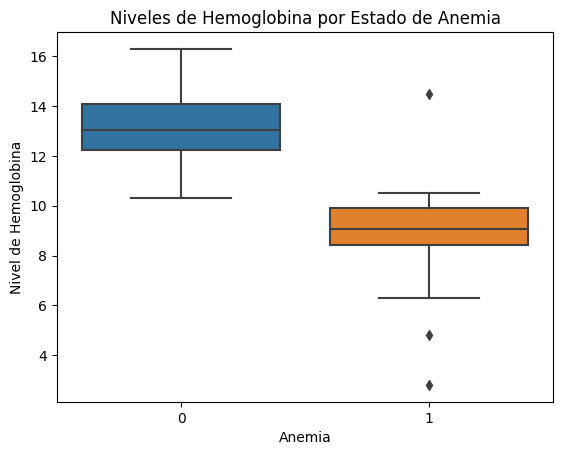

In [17]:
plt.figure()
sns.boxplot(x='Anaemic', y='Hb', data=df)
plt.title('Niveles de Hemoglobina por Estado de Anemia')
plt.xlabel('Anemia')
plt.ylabel('Nivel de Hemoglobina')
plt.show()


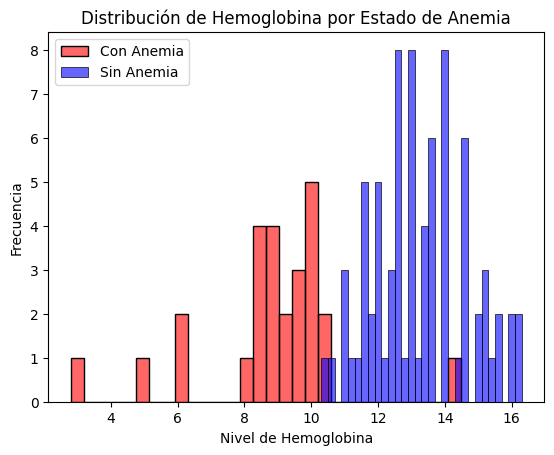

In [18]:
plt.figure()
sns.histplot(df[df['Anaemic'] == 1]['Hb'], bins=30, color='red', label='Con Anemia', alpha=0.6)
sns.histplot(df[df['Anaemic'] == 0]['Hb'], bins=30, color='blue', label='Sin Anemia', alpha=0.6)
plt.title('Distribución de Hemoglobina por Estado de Anemia')
plt.xlabel('Nivel de Hemoglobina')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


Podemos ver que los datos si son coherentres ya que la hemoglobina es baja en las personas anémicas y alta en las que no lo son exceptuando por un valor atipico de las personas anemicas. Por lo que podemos decir que esta variable es importante para nuestro modelo.

## 3. Modelos de Predicción

## 4. Análisis SHAP:

## 5.Conclusión